# 汽车目标用户预测

该数据集包含了社交网络中用户的信息。这些信息涉及用户ID,性别,年龄以及预估薪资。一家汽车公司刚刚推出了他们新型的豪华SUV，我们尝试预测哪些用户会购买这种全新SUV。并且在最后一列用来表示用户是否购买。我们将建立一种模型来预测用户是否购买这种SUV，该模型基于两个变量，分别是年龄和预计薪资。因此我们的特征矩阵将是这两列。我们尝试寻找用户年龄与预估薪资之间的某种相关性，以及他是否购买SUV的决定。

# Step 1 | Data Pre-Processing

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('../datasets/Social_Network_Ads.csv')
dataset.head()

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 步骤2 | 逻辑回归模型

该项工作的库将会是一个线性模型库，之所以被称为线性是因为逻辑回归是一个线性分类器，这意味着我们在二维空间中，我们两类用户（购买和不购买）将被一条直线分割。然后导入逻辑回归类。下一步我们将创建该类的对象，它将作为我们训练集的分类器。

## 将逻辑回归应用于训练集

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

# 步骤3 | 预测

In [26]:
## 预测测试集结果
y_pred = classifier.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

# 步骤4 | 评估预测

## 准确率

In [10]:
from sklearn.metrics import accuracy_score
train_score = accuracy_score(y_train,classifier.predict(X_train))
test_score = classifier.score(X_test,y_test) # 计算accuracy的另一种方法
print('训练集准确率：',train_score)
print('测试集准确率：',test_score)

训练集准确率： 0.8233333333333334
测试集准确率： 0.89


In [12]:
test_score = classifier.score(X_train,y_train)
test_score

0.8233333333333334

## 召回率

In [13]:
from sklearn.metrics import recall_score
train_recall=recall_score(y_train,classifier.predict(X_train),average='macro')
test_recall=recall_score(y_test,classifier.predict(X_test),average='macro')
print('训练集召回率：',train_recall)
print('测试集召回率：',test_recall)

训练集召回率： 0.7928642928642928
测试集召回率： 0.8529411764705883


在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.3，再看看这时的评估指标(主要是准确率和召回率)。
比如银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。
tips:sklearn的很多分类模型，predict_prob可以拿到预估的概率，可以根据它和设定的阈值大小去判断最终结果(分类类别)

In [18]:
y_pred_pro = classifier.predict_proba(X_test) ##获取预测概率值
y_pred_pro[:3] # 两列数据，其中一列为预测y=0的概率，另一列为y=1的概率

array([[0.88725351, 0.11274649],
       [0.83324206, 0.16675794],
       [0.80549253, 0.19450747]])

In [20]:
y_pred2 = [list(p >= 0.3).index(1) for i,p in enumerate(y_pred_pro)]   ##设定0.3阈值，把大于0.3的看成1分类。
train_score = accuracy_score(y_test,y_pred2)
print(train_score)

0.88


## 生成混淆矩阵

我们预测了测试集。 现在我们将评估逻辑回归模型是否正确的学习和理解。因此这个混淆矩阵将包含我们模型的正确和错误的预测。

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/Users/eleme/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eleme/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=f

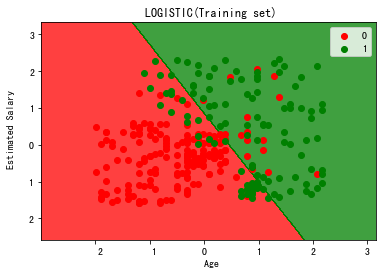

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/Users/eleme/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eleme/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=f

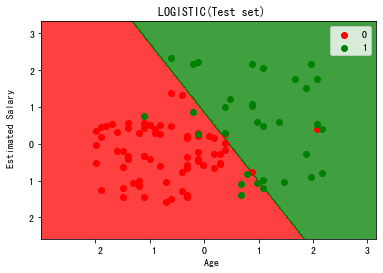

In [24]:
#### 可视化
from matplotlib.colors import ListedColormap
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red', 'green'))(i), label=j)

plt. title(' LOGISTIC(Training set)')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()

X_set,y_set = X_test,y_test
X1,X2 = np. meshgrid(np. arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np. arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red', 'green'))(i), label=j)

plt. title(' LOGISTIC(Test set)')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()